In [1]:
import pandas as pd

df =pd.read_csv("student_perfomance.csv")

df.head()

,studyhours,attendance,pastscore,internet,sleephours,passed
0,2,60,45,Yes,6,No
1,3,65,50,Yes,7,No
2,4,70,55,Yes,8,Yes
3,5,75,60,No,7,Yes
4,6,80,68,No,8,Yes


In [3]:
print(f'Rows {df.shape[0]},Columns:{df.shape[1]}')
print(df.info())

Rows 20,Columns:6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   studyhours  20 non-null     int64 
 1   attendance  20 non-null     int64 
 2   pastscore   20 non-null     int64 
 3   internet    20 non-null     object
 4   sleephours  20 non-null     int64 
 5   passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None


In [4]:
df.describe(include='all')

,studyhours,attendance,pastscore,internet,sleephours,passed
count,20.000000,20.000000,20.000000,20,20.000000,20
unique,NaN,NaN,NaN,2,NaN,2
top,NaN,NaN,NaN,Yes,NaN,Yes
freq,NaN,NaN,NaN,13,NaN,13
mean,4.850000,73.250000,60.200000,NaN,6.950000,NaN
std,2.277464,13.890076,15.723265,NaN,0.998683,NaN
min,1.000000,50.000000,35.000000,NaN,5.000000,NaN
25%,3.000000,60.000000,47.250000,NaN,6.000000,NaN
50%,5.000000,75.500000,61.000000,NaN,7.000000,NaN
75%,6.250000,84.250000,72.000000,NaN,8.000000,NaN


In [6]:
df.isnull().sum()

studyhours    0
attendance    0
pastscore     0
internet      0
sleephours    0
passed        0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
df['internet'] =le.fit_transform(df['internet'])
df['passed'] =le.fit_transform(df['passed'])

print(df.head())
print(df.dtypes)

   studyhours  attendance  pastscore  internet  sleephours  passed
0           2          60         45         1           6       0
1           3          65         50         1           7       0
2           4          70         55         1           8       1
3           5          75         60         0           7       1
4           6          80         68         0           8       1
studyhours    int64
attendance    int64
pastscore     int64
internet      int64
sleephours    int64
passed        int64
dtype: object


In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
features = ['studyhours','attendance','passed','sleephours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features]
y = df['passed'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model= LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"classification report {classification_report(y_test,y_pred)}")

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



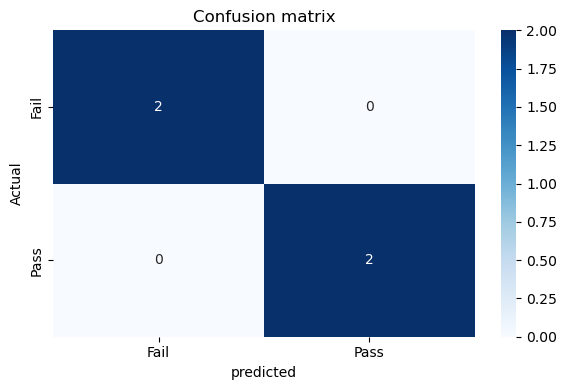

In [26]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True ,fmt= "d", cmap="Blues", xticklabels=["Fail","Pass"],yticklabels=["Fail","Pass"])

plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.tight_layout()
plt.show()


In [29]:
print('______ Predict Your Result _____')

try:
    study_hours = float(input("Enter study hours: "))
    attendence = float(input("Enter attendance (%): "))
    passed = float(input("Enter past score: "))
    sleep_hours = float(input("Enter sleep hours: "))

    # Match feature names exactly as in training
    user_input_df = pd.DataFrame([{
        'studyhours': study_hours,
        'attendence': attendence,
        'passed': passed,
        'sleephours': sleep_hours
    }])

    # Scale using the same scaler
    user_input_scaled = scaler.transform(user_input_df)

    # Predict
    prediction = model.predict(user_input_scaled)[0]
    result = "Pass" if prediction == 1 else "Fail"

    print(f"Prediction based on input: {result}")

except Exception as e:
    print("An error occurred:", e)

______ Predict Your Result _____


Enter study hours:  5
Enter attendance (%):  50
Enter past score:  60
Enter sleep hours:  8


An error occurred: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- attendence
Feature names seen at fit time, yet now missing:
- attendance

